## 데이터분석 목적

- 지도학습 ( y값 : 레이블을 제공 )
  - 베이스 공식 : wx + b => 회귀 분석
  - 베이스 공식 + (0~1 사이값으로만 출력) => 이항 분류
  - 베이스 공식 + 이항 분류 + 확률값 계산 => 다항 분류
  - AI에서는 다항분류의 softmax의 output값은 y값의 유니크 갯수로 결정
- 사이킷런은 이항다항분류 모두 => 다항분류로 나옴
  - => y 예측값이 2개 일때는 [확률1, 확률2]
  - => y 예측값이 4개 일때는 [확률1, 확률2, 확률3, 확률4]
  - =======> 가장 큰 확률값의 위치를 찾으면 y예측값이 됨
  
- 인공신경망은 이항분류는 sigmod, output 1개/ 다항분류는 softmax, output은 y 유니크갯수의값

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 


In [16]:
all = [var for var in globals() if var[0] != "_"]   # globals() 목록의 첫글자가 _ 로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]) #2개로 만들어서 0,1 으로만 만들어준다.
labels = ['fail', 'pass']

##########데이터 분석

##########데이터 전처리

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.8, random_state=777, stratify=y_data)

##########모델 학습
model = LogisticRegression(max_iter=9)  # 시그모이드함수로 제작됨
model.fit(x_train, y_train)

##########모델 검증
y_predict = model.predict(x_test)

print('---테스트-예측값--- ')
print(y_predict)  # 
print('\n--테스트-실제값--- ')
print(y_test)  # 
print('\n--테스트데이터 정확도--- ')
print(accuracy_score(y_test, y_predict)) #1.0 #정확도

---테스트-예측값--- 
[1 1 1 1 1 0 0 0 0 0]

--테스트-실제값--- 
[1 1 1 1 1 1 0 0 0 0]

--테스트데이터 정확도--- 
0.9


In [19]:
model.intercept_ ,model.coef_
#바이어스 ,       웨이트 array 구조로 w1, w2
#coef는 회귀에서만 확인한다.
#


(array([-3.25032911]), array([[0.17355315, 0.5533941 ]]))

In [7]:
x_train =[[2,3],[2,3],[2,3]]
y_train = [1,0,1]

x_test = [[2,3],[2,3],[2,3]]
y_test = [1,2,3]

model = LogisticRegression()
model.fit(x_train, y_train)

model.predict_proba(x_train)
model.predict_proba(x_test)

array([[0.33333143, 0.66666857],
       [0.33333143, 0.66666857],
       [0.33333143, 0.66666857]])

In [8]:
y_train

[1, 0, 1]

In [9]:
print(model.predict_proba(x_test))
print(model.predict(x_test))

[[0.33333143 0.66666857]
 [0.33333143 0.66666857]
 [0.33333143 0.66666857]]
[1 1 1]


In [ ]:
x_test = [1,2,3,4,1,2,1,2,1,1,2,1,2]
y_test = [1,0,1,0,1,0,1,0,1,0,1,0,1]
model = LogisticRegression() # 혼돈행렬 옵션 없이
model.fit(x_test,y_test)#

In [28]:
x_test = [1,2,3,4,1,2,1,2,1,1,2,1,2]
x_test = np.reshape(x_test, (-1,1)) # 에러 내용에 맞춰서 shape를 맞춰준다.
y_test = [1,0,1,0,1,0,1,0,1,0,1,0,1]
model = LogisticRegression() # 혼돈행렬 옵션 없이
model.fit(x_test, y_test)
model.coef_, model.intercept_
model.predict_proba(x_test) # 모델의 확률값, oroba , 하지만 이런걸 볼 일이... 언제 생기냐면, 임계점을 조정을 통해 확률을 높힌다.
model.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### [이항분류의 평가분류지표] 혼합행렬, 혼돈행렬
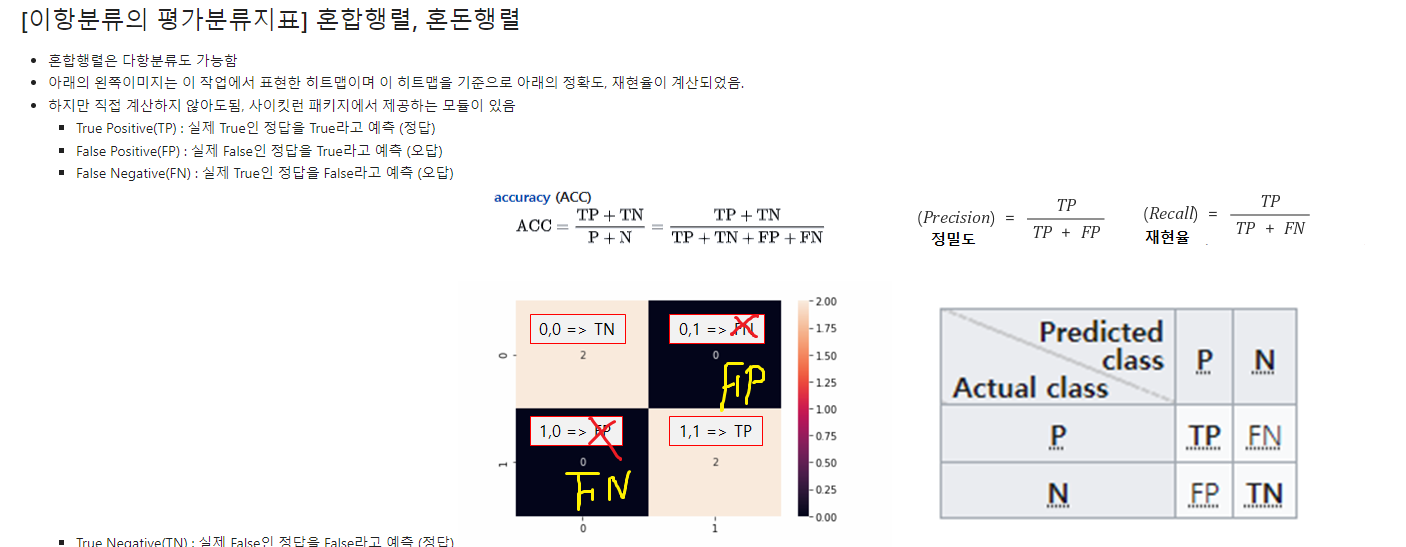


- 정밀도 정답을 맞출 확률
- 재현률 다 맞춘 확률 중에 한가지 경우
- 실무에서는 인식 못하는것만 꺼내서 보는경우가 많다.
- 머신러닝에서는 정밀도와 재현율이 많이 다르기 때문에 한번씩 볼것
- 그렇기 때문에 혼돈행렬이 있다.

In [30]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(x_test)

cm=confusion_matrix(y_test,y_predict )
print(cm)
#  결과물에서 1, 6만 보는것이다, 0을 0이라고, 1을 1이라고 하는것

[[1 5]
 [1 6]]


In [31]:
#시험 볼 사람들은 이공식을 기억하는게 좋다.

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict )
print(cm)

TN=cm[0][0] # TN: 00: 실제y값이0인데 모델에 넣은 예측값이 0인경우의 수가 4개
FP=cm[0][1] # FP: 01: 실제y값이0인데 모델에 넣은 예측값이 1인경우의 수가 0개
FN=cm[1][0] # FN:10: 실제y값이1인데 모델에 넣은 예측값이 0인경우의 수가 1개
TP=cm[1][1] # TT:11: 실제y값이1인데 모델에 넣은 예측값이 1인경우의 수가 5개

print(TN,FP,FN,TP)
# 정밀도  TP / (TP+FP)      실제값이1이고예측값도1인경우/ 예측값이 1인 경우의 수를 확인하는것 
Precision=TP/(TP+FP)
Precision


[[1 5]
 [1 6]]
1 5 1 6


0.5454545454545454

In [32]:
## 정확도:  0->0, 1->1 로 실제와예측데이터같은갯수/전체갯수
##          TN+TP / (TN+TP+FN+FP)
## TN: 0->0 
## TP: 1->1 
## FN:0인데 1로 예측함    
## FP: 1인데 0으로 예측함

import pandas as pd
ytest_pred=model.predict(x_test)
df=pd.DataFrame({'y':y_test,'y_pred':ytest_pred})

bigo=[]
for i,j in zip(df['y'],df['y_pred']):
    if i==1:
        if j==1:
            bigo.append('TP')
        else:
            bigo.append('FP')
    else:
        if j==0:
            bigo.append('TN')
        else:
            bigo.append('FN')
df['bigo']=bigo
print(df)


df['bigo'].value_counts()

    y  y_pred bigo
0   1       1   TP
1   0       1   FN
2   1       0   FP
3   0       0   TN
4   1       1   TP
5   0       1   FN
6   1       1   TP
7   0       1   FN
8   1       1   TP
9   0       1   FN
10  1       1   TP
11  0       1   FN
12  1       1   TP


TP    6
FN    5
FP    1
TN    1
Name: bigo, dtype: int64

In [34]:
model.predict_proba(x_test)

IndexError: index 13 is out of bounds for axis 0 with size 13

1.정확도(Accuracy) -> (TP + TN) / (TP + TN + FP + FN)
: 가장 직관적인 적절성 평가 단위입니다. 참을 참으로, 거짓을 거짓으로 정확히 분류해낸 것을 의미합니다. 높을수록 좋은 모델이며, 일반적으로 모델 훈련 과정에서 최적화 목적함수로써 사용됩니다.

2.정밀도(Precision) -> TP / (TP + FP)
: 참이라 예측한 경우 중 실제로 참일 경우의 비율을 의미합니다. 높을수록 좋은 모델이며, 예를 들면 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 됩니다.

3.재현율(Recall) = 민감도(Sensitivity) = TPR(True Positive Rate) -> TP / (TP + FN)
: 실제로 참인 경우 중 예측값도 참인 경우의 비율을 의미합니다. 높을수록 좋은 모델이며, 예를 들면 실제 사기 거래 중 실제 사기 라고 판단한 거래의 비율이 됩니다. 모델의 실용성과 관련된 척도라 말합니다.

In [ ]:
# https://jennainsight.tistory.com/entry/%EC%A0%95%EB%B0%80%EB%8F%84precision%EC%99%80-%EC%9E%AC%ED%98%84%EC%9C%A8recall%EC%9D%98-%EC%98%A4%EC%B0%A8%ED%96%89%EB%A0%AC-%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C
# https://junklee.tistory.com/6

### [F1 스코어등에 대한 이해, 아래 사이트의 38페이지 부터]
- https://books.google.co.kr/books?id=jxfpDwAAQBAJ&pg=PA41&lpg=PA41&dq=f1+%EA%B0%80%EC%A4%91%EC%B9%98%ED%8F%89%EA%B7%A0&source=bl&ots=zAdfB1s-xL&sig=ACfU3U2dPsQNKHuSshzF4ONORFDsLZmEDQ&hl=ko&sa=X&ved=2ahUKEwjBp4-I0LLzAhWPxYsBHYo5ANAQ6AF6BAgdEAM#v=onepage&q=f1%20%EA%B0%80%EC%A4%91%EC%B9%98%ED%8F%89%EA%B7%A0&f=false

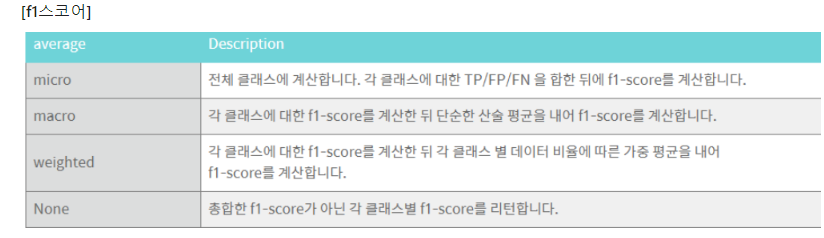

- 클래스 불균형(Imbalance) 문제가 있는 데이터셋에서는 Micro-average가 조금 더 효과적인 평가지표가 됨.
- Macro 값은 0.4로 정밀도의 평균에 더 가깝고, Micro 값은 0.123으로, 많이 관측된 클래스의 정밀도에 가까우며 Micro 는 샘플의 수에 영향을 받아서 클래스별 샘플 수를 고려한 Micro가 불균형 데이터셋에 있어 좋음

- 정밀도와 재현율은 서로 반비례 관계 이기 때문에 필요한 부분을 가져와야 한다.

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

# 혼돈 행렬 에서는 정확도를 확인하는데 f1스코어를 가지고 맞추고 서포트는 얼마나 잘 맞췄냐

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.55      0.86      0.67         7

    accuracy                           0.54        13
   macro avg       0.52      0.51      0.46        13
weighted avg       0.52      0.54      0.47        13



In [ ]:
from sklearn.metrics import f1_score

print('f1 score / micro: %0.3f'%f1_score(y_test,y_predict,average='micro'))
print('f1 score / macro: %0.3f'%f1_score(y_test,y_predict,average='macro'))
print('f1 score / weighted: %0.3f'%f1_score(y_test,y_predict,average='weighted'))
print(f1_score(y_test,y_predict,average=None))   # 혼돈행렬의 0, 1, 2 값의 f1-score임

### 텐서플로우 혼돈행렬

In [38]:
import tensorflow as tf

In [40]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()# 이러한 파라미터가 있다.

# 100480 = 28*28*128
# 1290


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.14

[0.07390255481004715, 0.9783999919891357]

In [45]:
model.predict(x_test[:10]) # x_test 값과 y_test값과 얼마나 잘 맞아 떨어졌냐

y_hat=[]

for x in model.predict(x_test[:10]):
    y_hat.append(np.argmax(x))
    
y_hat, y_test[:10] #실제값 , 예측값

1/1 [==============================] - 0s 3ms/step


([7, 2, 1, 0, 4, 1, 4, 9, 5, 9],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [46]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test[:10],y_hat )
print(cm)
# 튀는 값이 없으면 다 맞췄다는 얘기.

[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test[:10], y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



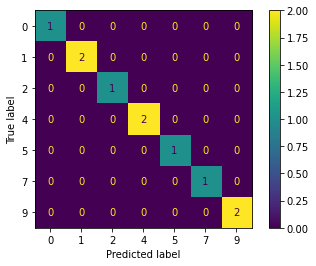

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test[:10],y_hat )
#print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.unique(y_hat))
disp.plot()

## 텐서플로우의 결과물을 혼돈행렬의 시각화

- 학습목표: 텐서플로우에서의 결과값을 혼돈행렬로 시각해보고자함. (인공신경망 강의할때 다시 합니다.)
- 모델 내용은 몰라도 됨. 인공신경망에서 다시 강의함.
- 단 이자료의 특징은 알아야됩니다.
- 이 자료는 손글씨 0,1,2,3,4,5,6,7,8,9 의 가로 세로 28,28의 흑백이미지를 학습하는 데이터 임
- https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [51]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 사이트외 추가코드
np.shape(x_train), np.shape(y_train), np.shape(x_test),np.shape(y_test)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'test_data --> y count')

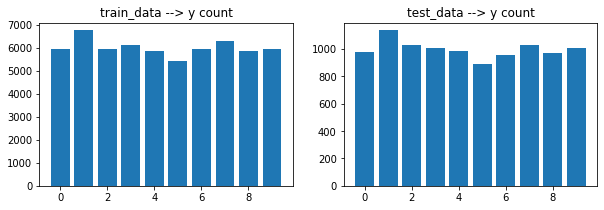

In [52]:
# 사이트외 추가코드 
# y값의 분포도를 확인하기 위하여 하는 작업임
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
countTrain=np.unique(y_train, return_counts=True)
plt.bar(countTrain[0],countTrain[1])
plt.title('train_data --> y count')

plt.subplot(1,2,2)
countTrain=np.unique(y_test, return_counts=True)
plt.bar(countTrain[0],countTrain[1])
plt.title('test_data --> y count')

In [53]:
x_train, x_test = x_train / 255.0, x_test / 255.0   # 데이터정규화

# 아래의 모델은 인공신경망에서 강의함.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),       # input 데이터에서 28,28을 faltten으로 28*28의 784로 변경함.
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')   # 10은 y_train 값의  unique 값만큼임
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 780us/step - loss: 0.2913 - accuracy: 0.9162
Epoch 2/5
1875/1875 [==============================] - 1s 776us/step - loss: 0.1406 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 1s 791us/step - loss: 0.1041 - accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 1s 781us/step - loss: 0.0854 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 1s 785us/step - loss: 0.0707 - accuracy: 0.9777
313/313 - 0s - loss: 0.0769 - accuracy: 0.9760 - 200ms/epoch - 640us/step


[0.07692615687847137, 0.9760000109672546]

### 텐서플로우 사이트외 추가자료[ 혼돈행렬 시각화 ]

In [54]:
predict=model.predict(x_test)
y_hat=np.argmax(predict,axis=1)   # 예측값을 열단위로  axis=1 로함

313/313 [==============================] - 0s 496us/step


In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_hat)
print(cm)

[[ 970    0    0    2    1    1    3    1    1    1]
 [   0 1116    3    3    0    1    3    1    8    0]
 [   3    0 1005    2    3    0    2    7   10    0]
 [   0    0    8  989    0    3    0    5    4    1]
 [   0    0    2    0  962    0    5    0    0   13]
 [   3    0    0   10    2  865    3    1    5    3]
 [   8    2    0    1   12    6  925    0    4    0]
 [   1    5    9    5    1    0    0  997    1    9]
 [   2    0    2    2    5    5    1    2  947    8]
 [   0    2    0    6    9    2    1    3    2  984]]


In [62]:
yy_test=[0,1,1,2,7,6,2,3,6,8]
yy_hat = [1,1,1,2,7,6,2,5,4,7]

tmp = np.unique(yy_test + yy_hat)
#yy_test로 그려도 안되고 yy_hat으로 그려도 안됨
# yy_hat에서 4,5 값이 없고
# 레이블에는 모든 값이 들어가야 하기 때문에 두개의 test 값과 hat값을 더해서 라벨로 사용해줘야 제대로 나온다.

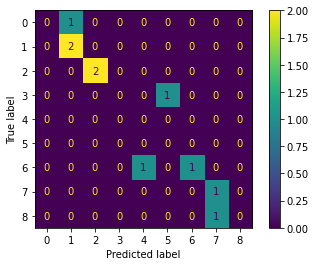

In [65]:
label=np.unique(y_hat)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(yy_test,yy_hat )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tmp)  # label
disp.plot()

# 우리가 원하는건 나눠낸다.
# 가로세로 행렬 구조로써 데이터 값의 맞춤의 갯수를 확

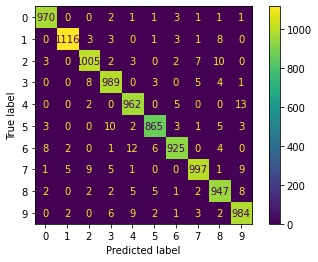

In [66]:
label=np.unique(y_hat)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_hat )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=label)  # label
disp.plot()

<AxesSubplot:>

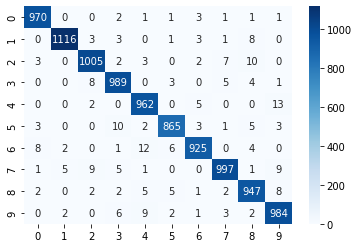

In [67]:
# seaborn 패키지를 이용하여서 작업해도 됨
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')

#색상이 진하면 진할수록 잘 맞췄다.

### 모형적합도

In [68]:
!pip install statsmodels

In [71]:
# https://wikidocs.net/87222

x_train = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_train = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

import statsmodels.api as sm
logit_mod = sm.Logit(y_train, x_train)
results = logit_mod.fit()
results.summary()

# 모형 적합도는 개념만
# OLS 오디너리 로직스 최소 제곱법, 오늘할건 아니지만 알아만 두기
# 인공신경망은 w b 를 무작위로 만든 후 계속 갱신 해나가는 방법
# 지금 하는 머신러닝은 최소제곱법공식으로 w b 를 만들어서 나간다.
# w,b 를 구하는 공식이 따로 있다.
# 모델의 설명력 = y 값을 예측 분류하기에 적합한 x 인가?
# 은행권은 이부분에 대해서 제대로 알아야 한다.

Optimization terminated successfully.
         Current function value: 0.523145
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.2298
Time:                        13:18:00   Log-Likelihood:                -6.2777
converged:                       True   LL-Null:                       -8.1503
Covariance Type:            nonrobust   LLR p-value:                   0.05296
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3299      0.342      0.965      0.334      -0.340       1.000
x2            -0.0829      0.258     -0.322      0.748      -0.588       0.422
==============================================================================
"""

### results.summary() 의 결과 값

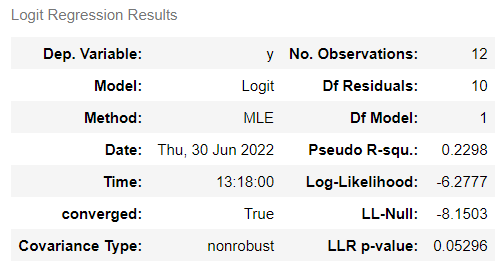

## ROC커브곡선
- 구글링 해보세요
- https://m.blog.naver.com/sharp_kiss/221599009671
- 이항분류에서 일치율을 시각화함. 이때 ROC의 하단면적을 AUC라고 함. AUC가 클수록 좋은 결과임.
- 이항분류 밖에 못하지만 편법을 사용해서 다양하게 사용 가능
- 이항분류에서 많이 사용하는 커브 곡선


In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# y값: admit: 합격1, 불합격 0

# x값:
# gre: 점수, gpa:학점평균
# prestige: 출신학교(1이 가장 좋은 학교, 4가 가장 않좋은 학교)
# 출신학교의 1,2,3,4는 일종의 카테고리(그룹항목)
# 이러한 그룹항목은 범주형자료임=>더미변수화를 작업해야함. 
# (일부에서는 이 작업을 원핫인코딩이라고 하기도함)

df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [73]:
df[['pre_1','pre_2','pre_3','pre_4']]=pd.get_dummies(df['prestige'])
df.head()

,admit,gre,gpa,prestige,pre_1,pre_2,pre_3,pre_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [74]:
y=df['admit']
x=df[['gre','gpa','pre_1','pre_2','pre_3','pre_4']]

from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression(C=100,max_iter=500)
model.fit(x,y)
y_preds=model.predict(x)
print(accuracy_score(y, y_preds)) #1.0 #정확도

0.7103274559193955


In [75]:
tmp=model.predict_proba(x)

cnt=0; errindex=[]
for i, j in zip(y,y_preds):
    if i==1 and j==0:
        errindex.append(cnt)
    cnt+=1
tmp[errindex][:5]

array([[0.70918913, 0.29081087],
       [0.82096808, 0.17903192],
       [0.62992211, 0.37007789],
       [0.57714697, 0.42285303],
       [0.79816208, 0.20183792]])

[[252  19]
 [ 96  30]]


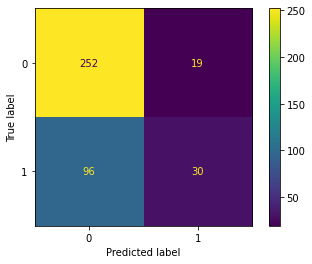

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y, y_preds)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y, y_preds))
# 모형 적합도 는 잘 만들었는지 확인하는것

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       271
           1       0.61      0.24      0.34       126

    accuracy                           0.71       397
   macro avg       0.67      0.58      0.58       397
weighted avg       0.69      0.71      0.66       397



In [78]:
# 최소제곱법할때 기본으로는 w(회귀계수)만 주고 b(절편)제공안함.
x['intercept']=1   # 상수항 추가방법론중 
xx=x[['intercept','gre','gpa','pre_2','pre_3','pre_4']]
import statsmodels.api as sm
logit_mod = sm.Logit(y, xx)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                 0.08166
Time:                        13:27:20   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
Covariance Type:            nonrobust   LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
pre_2         -0.6801      0.317     -2.146      0.032      -1.301      -0.059
pre_3         -1.3387      0.345     -3.882      0.000      -2.015      -0.663
pre_4         -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [79]:
np.exp(results.params)

# gpa라는 학점평균 2.18의 값의 의미하는것은
 # --> gpa가1 증가할때마다 합격확률이 2.1배증가함을 뜻함

# x값:
# gre: 점수, gpa:학점평균
# prestige: 출신학교(1이 가장 좋은 학교, 4가 가장 않좋은 학교)
# 출신학교의 1,2,3,4는 일종의 카테고리(그룹항목)
# 이러한 그룹항목은 범주형자료임=>더미변수화를 작업해야함. 
# (일부에서는 이 작업을 원핫인코딩이라고 하기도함)
# 카테고리컬 변수인  pre_2,_3,_4는 1대비하여서 2로 가면 합격률이 50%

intercept    0.020716
gre          1.002221
gpa          2.180027
pre_2        0.506548
pre_3        0.262192
pre_4        0.211525
dtype: float64

넘파이로 로직 공부하고 싶으신 분들은 프로그래머스 에서 기본부터 풀어보시면 됩니다.

## 정밀도 재현율 트레이드 오프

- 정밀도와 재현율의 곡선이 서로 멀어진다.
- 

## 의사결정 트리

In [81]:
import pandas as pd
import matplotlib.pyplot as plt   # package for plotting
from sklearn.datasets import load_iris # 아이리스 품종 분류 데이터
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 
plt.rcParams["font.family"] = 'NanumBarunGothic' # 한글폰트 전역 설정

In [82]:
data = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, random_state=0)

In [83]:
clf0 = DT(max_depth=3, random_state=0)
clf0.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


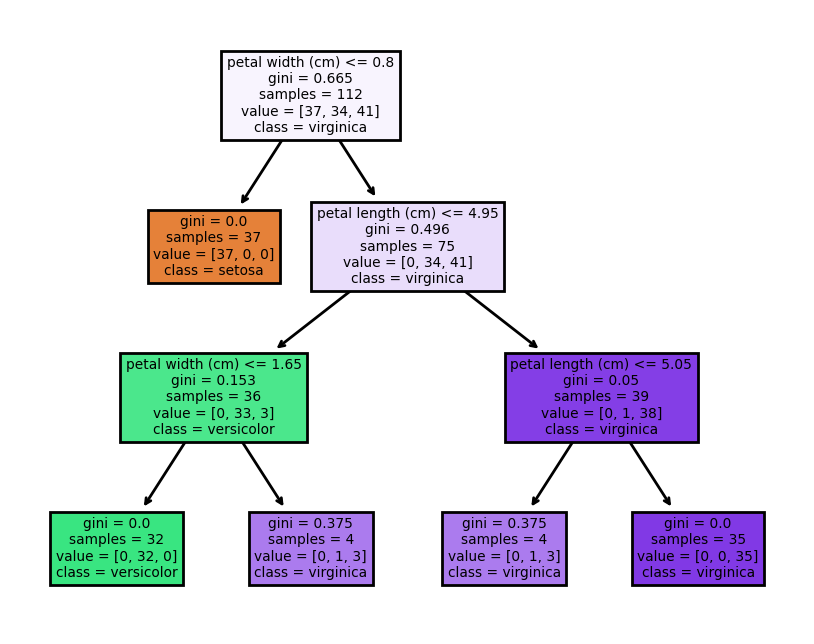

In [84]:
plt.figure(figsize=(5,4), dpi=200)
plot_tree(clf0, 
         feature_names = data.feature_names,#["꽃받침길이", "꽃받침폭",  "꽃잎길이", "꽃잎폭" ], 
         class_names=data.target_names,
          filled=True)
plt.show()

In [91]:
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [92]:
!pip install pydot

In [93]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

In [94]:
draw_decision_tree(tree1)

FileNotFoundError: [WinError 2] "dot" not found in path.

In [95]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

NameError: name 'mpl' is not defined

## 그리드 서치 + 랜덤 포레스트

- 머신러닝은 어떠한 모델을 사용자가 선택하는가에 따라 성능이 달라짐.
- 대량의 데이터셋은 경사하강이 기반인 그라디언트 부스팅 모델을 거의 사용함
- AutoML

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2])

labels = ['A', 'B', 'C']

##########데이터 분석

##########데이터 전처리

#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

##########모델 생성

model = DecisionTreeClassifier()

##########모델 학습

##########모델 검증

print(model.get_params().keys()) #

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6]
}
grid_search = GridSearchCV(model, param_grid=param_grid) 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5) 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5)) 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy') 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy') 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=make_scorer(accuracy_score)) 
#grid_search = GridSearchCV(model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(accuracy_score)) 

grid_search.fit(x_data, y_data)

print(grid_search.best_params_) #{'alpha': 0.5}
print(grid_search.best_score_) #-2.8938345053645973
df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by='mean_test_score', ascending=False)
print(df[['params', 'mean_test_score']])   
'''
           params  mean_test_score
0  {'alpha': 0.5}        -2.893835
1    {'alpha': 1}        -3.618589
2  {'alpha': 1.5}        -4.449471
'''

##########모델 예측

x_test = np.array([
    [4, 6]
])

best_model = grid_search.best_estimator_
y_predict = best_model.predict(x_test)
label = labels[y_predict[0]]
y_predict = best_model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(label, confidence) #

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
{'criterion': 'gini', 'max_depth': None}
1.0
                                         params  mean_test_score
0      {'criterion': 'gini', 'max_depth': None}              1.0
1         {'criterion': 'gini', 'max_depth': 2}              1.0
2         {'criterion': 'gini', 'max_depth': 3}              1.0
3         {'criterion': 'gini', 'max_depth': 4}              1.0
4         {'criterion': 'gini', 'max_depth': 5}              1.0
5         {'criterion': 'gini', 'max_depth': 6}              1.0
6   {'criterion': 'entropy', 'max_depth': None}              1.0
7      {'criterion': 'entropy', 'max_depth': 2}              1.0
8      {'criterion': 'entropy', 'max_depth': 3}              1.0
9      {'criterion': 'entropy', 'max_depth': 4}              1.0
10     {'criterio

In [ ]:
import numpy as np
import math

##########데이터 로드

x_data = np.array([
    [0, 0],
    [0, 0],
    [0, 0],
    [1, 1],
    [1, 1],
    [0, 1],
    [1, 1],
    [1, 1],
    [1, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

## 머신러닝

- 머신러닝은 어떠한 모델을 사용자가 선택하는가에 따라 성능이 달라짐.
- 대량의 데이터셋은 경사하강이 기반인 그라디언트부스팅 모델을 거의 사용함
- 머신러닝에서 어떤 모델의 어떤 옵션값을 사용해야 최적의 결과를 얻을수 있는지를 기계학습으로 처리하는 AutoML이 대세임

#### Running "MLBox" auto-ML package on Titanic

- https://www.kaggle.com/code/axelderomblay/running-mlbox-auto-ml-package-on-titanic